In [1]:
import numpy as np
from keras.utils import np_utils
np.random.seed(10)
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
def show_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)  # 數字圖片大小
    plt.imshow(image, cmap='binary')  # 黑白灰階顯示
    plt.show() 

In [3]:
def show_images_labels_predictions(images,labels,
                                  predictions,start_id,num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        #顯示黑白圖片
        ax.imshow(images[start_id], cmap='binary')
        
        # 有 AI 預測結果資料, 才在標題顯示預測結果
        if( len(predictions) > 0 ) :
            title = 'ai = ' + str(predictions[i])
            # 預測正確顯示(o), 錯誤顯示(x)
            title += (' (o)' if predictions[i]==labels[i] else ' (x)') 
            title += '\nlabel = ' + str(labels[i])
        # 沒有 AI 預測結果資料, 只在標題顯示真實數值
        else :
            title = 'label = ' + str(labels[i])
            
        # X, Y 軸不顯示刻度    
        ax.set_title(title,fontsize=12) 
        ax.set_xticks([]);ax.set_yticks([])        
        start_id+=1 
    plt.show()

In [4]:
#建立訓練資料和測試資料，包括訓練特徵集、訓練標籤和測試特徵集、測試標籤
(train_feature, train_label),(test_feature, test_label) = mnist.load_data()

In [5]:
print(len(train_feature), len(train_label))

60000 60000


In [6]:
print(train_feature.shape, train_label.shape)

(60000, 28, 28) (60000,)


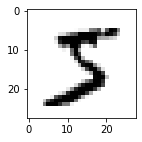

In [7]:
show_image(train_feature[0]) 

In [8]:
print(train_label[0])

5


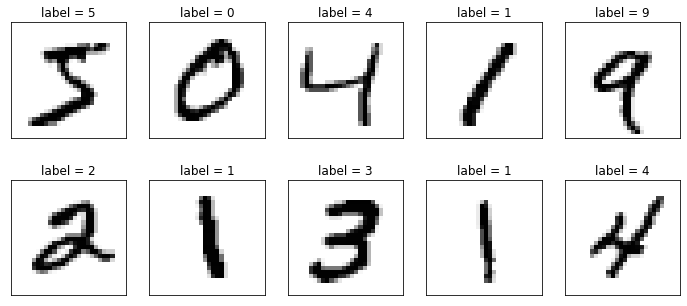

In [9]:
show_images_labels_predictions(train_feature,train_label,[],0,10)

In [10]:
#將 Features 特徵值換為 784個 float 數字的 1 維向量
train_feature_vector =train_feature.reshape(len(train_feature), 784).astype('float32')
test_feature_vector = test_feature.reshape(len( test_feature), 784).astype('float32')

In [11]:
print(train_feature_vector.shape, test_feature_vector.shape)

(60000, 784) (10000, 784)


In [12]:
#Features 特徵值標準化
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255

In [13]:
print(train_feature_normalize[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [14]:
print(train_label[0:5])

[5 0 4 1 9]


In [15]:
#label 轉換為 One-Hot Encoding 編碼
train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)

In [16]:
print(train_label_onehot[0:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [17]:
#建立模型
model = Sequential()

W0827 09:52:30.890596 24452 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [18]:
#輸入層：784, 隱藏層：256，輸出層：10
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

W0827 09:52:33.851731 24452 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0827 09:52:34.447395 24452 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



In [19]:
#定義訓練方式
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

W0827 09:52:37.058656 24452 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0827 09:52:37.088660 24452 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [20]:
#以(train_feature_normalize,train_label_onehot)資料訓練，
#訓練資料保留 20% 作驗證,訓練 10 次、每批次讀取 200 筆資料，顯示簡易訓練過程
train_history =model.fit(x=train_feature_normalize,
                         y=train_label_onehot,validation_split=0.2, 
                         epochs=10, batch_size=200,verbose=2)

W0827 09:52:40.211486 24452 deprecation.py:323] From D:\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0827 09:52:40.252177 24452 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.4387 - acc: 0.8827 - val_loss: 0.2182 - val_acc: 0.9407
Epoch 2/10
 - 1s - loss: 0.1908 - acc: 0.9454 - val_loss: 0.1559 - val_acc: 0.9557
Epoch 3/10
 - 1s - loss: 0.1354 - acc: 0.9617 - val_loss: 0.1262 - val_acc: 0.9645
Epoch 4/10
 - 1s - loss: 0.1027 - acc: 0.9703 - val_loss: 0.1121 - val_acc: 0.9680
Epoch 5/10
 - 1s - loss: 0.0810 - acc: 0.9771 - val_loss: 0.0980 - val_acc: 0.9716
Epoch 6/10
 - 1s - loss: 0.0659 - acc: 0.9817 - val_loss: 0.0931 - val_acc: 0.9729
Epoch 7/10
 - 1s - loss: 0.0543 - acc: 0.9849 - val_loss: 0.0910 - val_acc: 0.9734
Epoch 8/10
 - 1s - loss: 0.0459 - acc: 0.9876 - val_loss: 0.0829 - val_acc: 0.9759
Epoch 9/10
 - 1s - loss: 0.0379 - acc: 0.9903 - val_loss: 0.0822 - val_acc: 0.9759
Epoch 10/10
 - 1s - loss: 0.0315 - acc: 0.9917 - val_loss: 0.0805 - val_acc: 0.9768


In [21]:
#評估準確率
scores = model.evaluate(test_feature_normalize, test_label_onehot)
print('\n準確率=',scores[1])

10000/10000 [==============================] - 0s 15us/step

準確率= 0.9761


In [22]:
#預測
prediction=model.predict_classes(test_feature_normalize)

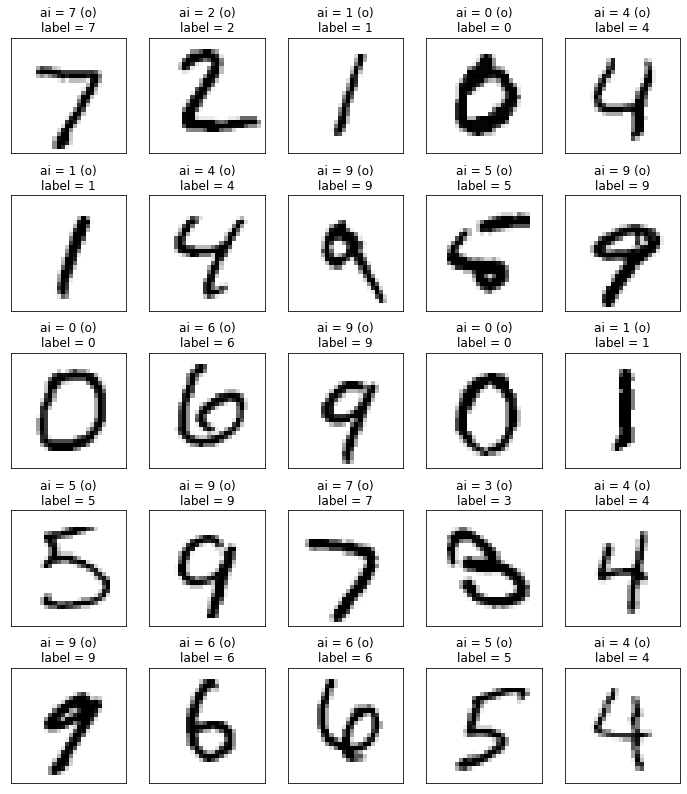

In [23]:
#顯示圖像、預測值、真實值 
show_images_labels_predictions(test_feature,test_label,prediction,0,30)